In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df_iris = pd.read_csv('/content/drive/MyDrive/Data/IRIS.csv')
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df_iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**Data Visualization and Exploration**

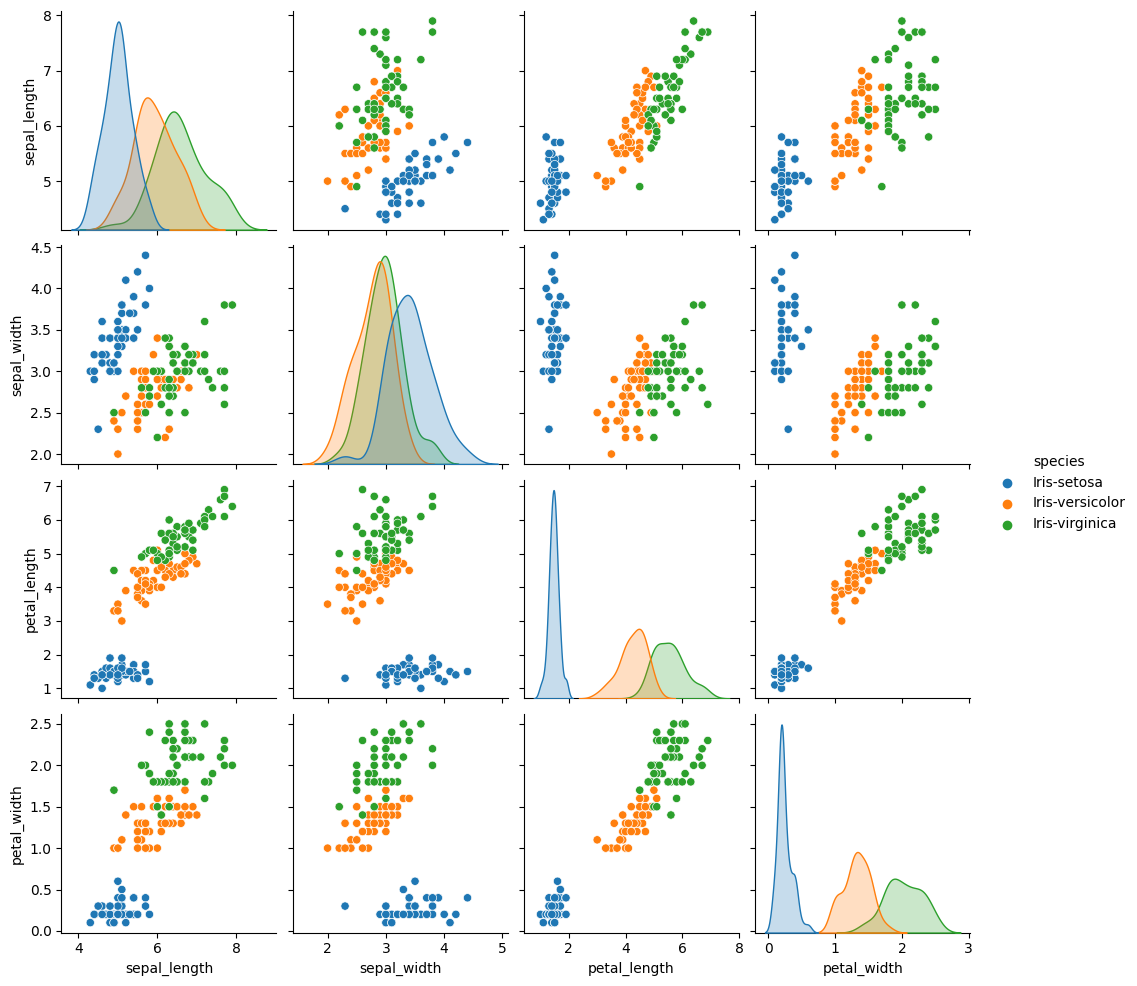

In [8]:
#visualizing the data
sns.pairplot(df_iris, hue="species")
plt.show()


**Data Preprocessing**

In [9]:
#preparing the data for model training using Label Encoder
label_encoder = LabelEncoder()
df_iris["species"] = label_encoder.fit_transform(df_iris["species"])


In [10]:
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [14]:
#splitting the data into features  and the target variable
x = df_iris.drop("species", axis=1)
y = df_iris["species"]



In [15]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [17]:
#split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [18]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [19]:
x_test

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


In [20]:
y_train

22     0
15     0
65     1
11     0
42     0
      ..
71     1
106    2
14     0
92     1
102    2
Name: species, Length: 120, dtype: int64

In [21]:
y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
Name: species, dtype: int64

**Model Selection and training**

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)


In [24]:
# Train the model
clf.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
logreg= LogisticRegression(random_state=42)

In [34]:
# Train the Logistic Regression classifier
logreg.fit(x_train, y_train)


LogisticRegression(random_state=42)

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

# Create and Train a Gradient Boosting classifier
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

gradient_boosting_classifier.fit(x_train, y_train)


GradientBoostingClassifier(random_state=42)

**Model Evaluation**

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set and calculate accuracy
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [27]:
# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [28]:
# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the Logistic Regression model on the test set and calculate accuracy
logistic_pred = logistic_classifier.predict(x_test)

logistic_accuracy = accuracy_score(y_test, logistic_pred)
print("Logistic Regression Accuracy:", logistic_accuracy)



Logistic Regression Accuracy: 1.0


In [41]:
# Generate a classification report
logistic_report = classification_report(y_test, logistic_pred)
print("Logistic Regression Classification Report:\n", logistic_report)



Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [42]:
# Generate a confusion matrix
logistic_cm = confusion_matrix(y_test, logistic_pred)
print("Logistic Regression Confusion Matrix:\n", logistic_cm)


Logistic Regression Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the Gradient Boosting model on the test set and calculate accuracy
gb_pred = gradient_boosting_classifier.predict(x_test)

gb_accuracy = accuracy_score(y_test, gb_pred)
print("Gradient Boosting Accuracy:", gb_accuracy)



Gradient Boosting Accuracy: 1.0


In [46]:
# Generate a classification report
gb_report = classification_report(y_test, gb_pred)
print("Gradient Boosting Classification Report:\n", gb_report)


Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [47]:
# Generate a confusion matrix
gb_cm = confusion_matrix(y_test, gb_pred)
print("Gradient Boosting Confusion Matrix:\n", gb_cm)

Gradient Boosting Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Using RandomForestClassifier, LogisticRegression, and GradientBoostingClassifier for Model Training and Evaluation,the accuracy for all is 100 percent

**Visualization After Splitting**

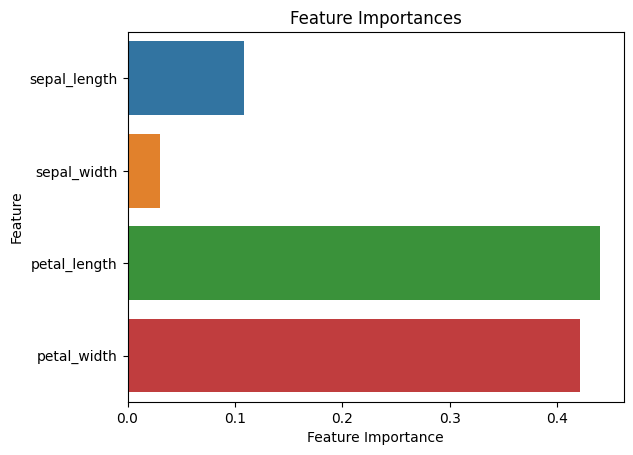

In [48]:
# Plot feature importances
feature_importances = clf.feature_importances_
sns.barplot(x=feature_importances, y=x.columns)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importances")
plt.show()


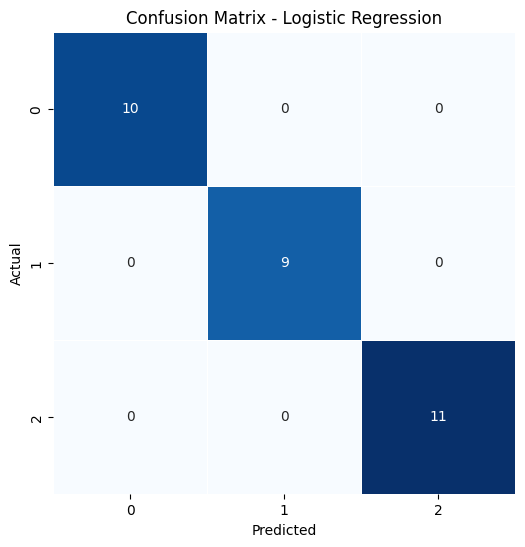

In [49]:
import seaborn as sns

# Confusion Matrix Heatmap for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(logistic_cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, square=True, cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

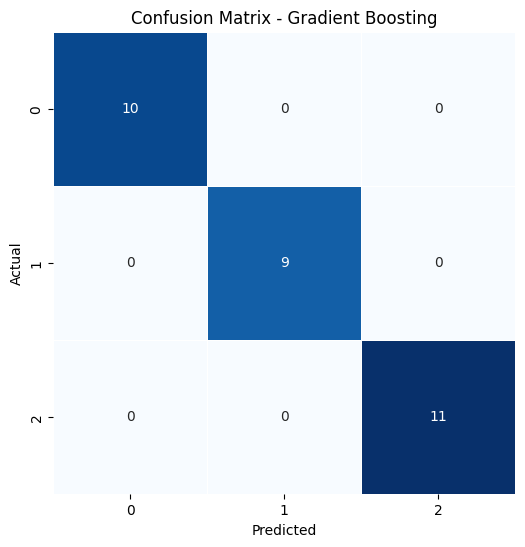

In [50]:
# Confusion Matrix Heatmap for Gradient Boosting
plt.figure(figsize=(8, 6))
sns.heatmap(gb_cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, square=True, cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

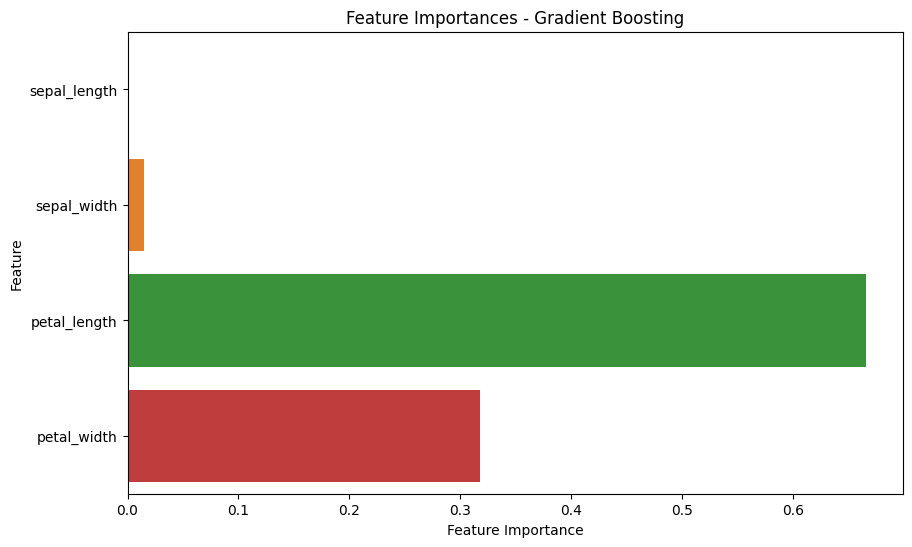

In [51]:
# Plot feature importances for Gradient Boosting
feature_importances_gb = gradient_boosting_classifier.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_gb, y=X.columns)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importances - Gradient Boosting")
plt.show()


Summary and Conclusion:

In this task, I successfully developed and evaluated machine learning models to classify Iris flowers into their respective species based on sepal and petal measurements. The analysis included three classification algorithms: RandomForestClassifier, LogisticRegression, and GradientBoostingClassifier.

Results:

RandomForestClassifier achieved an accuracy of 100%.
LogisticRegression achieved an accuracy of 100%.
GradientBoostingClassifier achieved an accuracy of 100%.

These models offer varying levels of accuracy and complexity that allows choosing the best-fit model based on project requirements and evaluation criteria.